In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749 -O aerofit.csv

--2023-04-07 14:50:04--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.173, 108.157.172.10, 108.157.172.176, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit.csv’

aerofit.csv         100%[===================>]   7.11K  --.-KB/s    in 0s      

2023-04-07 14:50:05 (926 MB/s) - ‘aerofit.csv’ saved [7279/7279]



# 1. Defining Problem Statement and Analysing basic metrics

## Problem Statement

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

## Analysing basic metrics

The dataset has the following columns:

* Product Purchased:	KP281, KP481, or KP781
* Age:	In years
* Gender:	Male/Female
* Education:	In years
* MaritalStatus:	Single or partnered
* Usage:	The average number of times the customer plans to use the treadmill each week.
* Income:	Annual income (in $)
* Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
* Miles:	The average number of miles the customer expects to walk/run each week



## 1.1 Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [3]:
df=pd.read_csv('aerofit.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
#shape of data
df.shape

(180, 9)

In [5]:
#data types of all the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
#statistical summary
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


# 2. Non-Graphical Analysis: Value counts and unique attributes

In [7]:
#Value counts
for i in df.columns:
  print(i,'-',dict(df[i].value_counts()))
  print()


Product - {'KP281': 80, 'KP481': 60, 'KP781': 40}

Age - {25: 25, 23: 18, 24: 12, 26: 12, 28: 9, 35: 8, 33: 8, 30: 7, 38: 7, 21: 7, 22: 7, 27: 7, 31: 6, 34: 6, 29: 6, 20: 5, 40: 5, 32: 4, 19: 4, 48: 2, 37: 2, 45: 2, 47: 2, 46: 1, 50: 1, 18: 1, 44: 1, 43: 1, 41: 1, 39: 1, 36: 1, 42: 1}

Gender - {'Male': 104, 'Female': 76}

Education - {16: 85, 14: 55, 18: 23, 15: 5, 13: 5, 12: 3, 21: 3, 20: 1}

MaritalStatus - {'Partnered': 107, 'Single': 73}

Usage - {3: 69, 4: 52, 2: 33, 5: 17, 6: 7, 7: 2}

Fitness - {3: 97, 5: 31, 2: 26, 4: 24, 1: 2}

Income - {45480: 14, 52302: 9, 46617: 8, 54576: 8, 53439: 8, 50028: 7, 51165: 7, 40932: 6, 48891: 5, 32973: 5, 35247: 5, 38658: 5, 34110: 5, 43206: 5, 57987: 4, 44343: 4, 36384: 4, 64809: 3, 90886: 3, 60261: 3, 92131: 3, 59124: 3, 88396: 2, 49801: 2, 83416: 2, 64741: 2, 61006: 2, 48556: 2, 31836: 2, 47754: 2, 89641: 2, 61398: 2, 56850: 2, 67083: 2, 42069: 2, 39795: 2, 37521: 2, 104581: 2, 99601: 1, 103336: 1, 85906: 1, 52290: 1, 77191: 1, 74701: 1, 958

In [8]:
#unique number of attributes
for i in df.columns:
    print(f'{i} = {df[i].nunique()}')
    print()

Product = 3

Age = 32

Gender = 2

Education = 8

MaritalStatus = 2

Usage = 6

Fitness = 5

Income = 62

Miles = 37



In [9]:
#unique attributes 
for i in df.columns:
  print(f'{i} - {list(df[i].unique())}')
  print()

Product - ['KP281', 'KP481', 'KP781']

Age - [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42]

Gender - ['Male', 'Female']

Education - [14, 15, 12, 13, 16, 18, 20, 21]

MaritalStatus - ['Single', 'Partnered']

Usage - [3, 2, 4, 5, 6, 7]

Fitness - [4, 3, 2, 1, 5]

Income - [29562, 31836, 30699, 32973, 35247, 37521, 36384, 38658, 40932, 34110, 39795, 42069, 44343, 45480, 46617, 48891, 53439, 43206, 52302, 51165, 50028, 54576, 68220, 55713, 60261, 67083, 56850, 59124, 61398, 57987, 64809, 47754, 65220, 62535, 48658, 54781, 48556, 58516, 53536, 61006, 57271, 52291, 49801, 62251, 64741, 70966, 75946, 74701, 69721, 83416, 88396, 90886, 92131, 77191, 52290, 85906, 103336, 99601, 89641, 95866, 104581, 95508]

Miles - [112, 75, 66, 85, 47, 141, 103, 94, 113, 38, 188, 56, 132, 169, 64, 53, 106, 95, 212, 42, 127, 74, 170, 21, 120, 200, 140, 100, 80, 160, 180, 240, 150, 300, 280, 260, 360]



# 3. Visual Analysis - Univariate & Bivariate

## 3.1 For continuous variable(s)

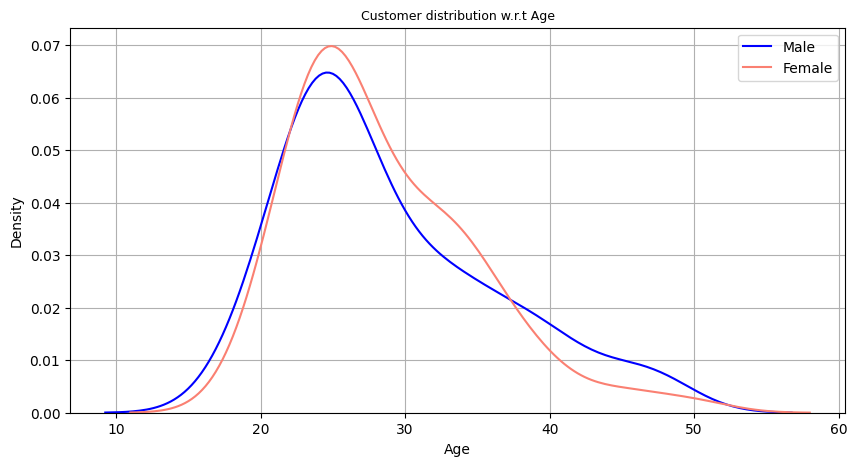

In [27]:
#Male/Female customer distribution w.r.t Age
plt.figure(figsize=(10,5))
plt.title('Customer distribution w.r.t Age', fontsize=9)
sns.kdeplot(data=df.loc[df['Gender']=='Male'],x='Age',color='blue')
sns.kdeplot(data=df.loc[df['Gender']=='Female'],x='Age',color='salmon')
plt.legend(['Male','Female'])
plt.grid()
plt.show()

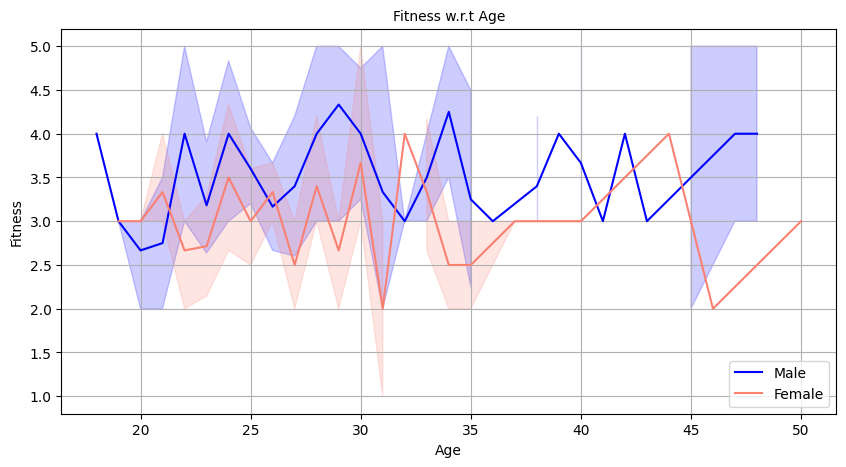

In [11]:
#Male/Female customers - Fitness w.r.t Age
plt.figure(figsize=(10,5))
sns.lineplot(data=df.loc[df['Gender']=='Male'],x='Age',y='Fitness',color='blue',label='Male')
sns.lineplot(data=df.loc[df['Gender']=='Female'],x='Age',y='Fitness',color='salmon',label='Female')
plt.legend(loc='lower right')
plt.title('Fitness w.r.t Age',fontsize=10)
plt.grid()
plt.show()

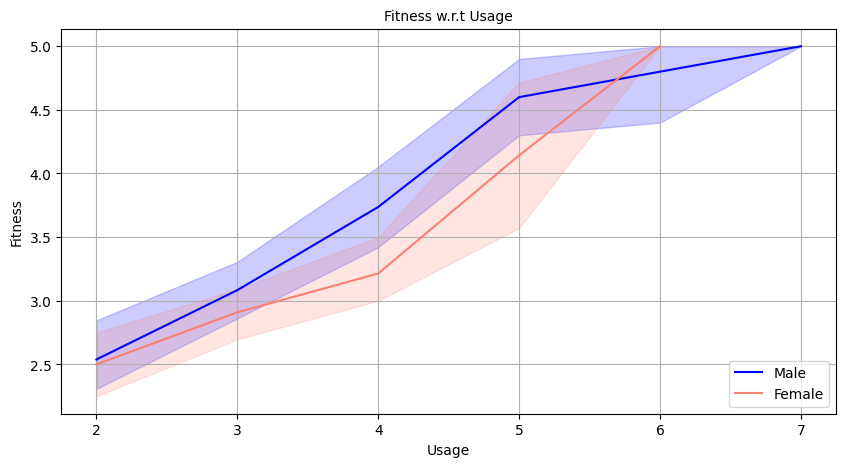

In [12]:
#Male/Female customers - Fitness w.r.t Usage
plt.figure(figsize=(10,5))
sns.lineplot(data=df.loc[df['Gender']=='Male'],x='Usage',y='Fitness',color='blue',label='Male')
sns.lineplot(data=df.loc[df['Gender']=='Female'],x='Usage',y='Fitness',color='salmon',label='Female')
plt.legend(loc='lower right')
plt.title('Fitness w.r.t Usage',fontsize=10)
plt.grid()
plt.show()

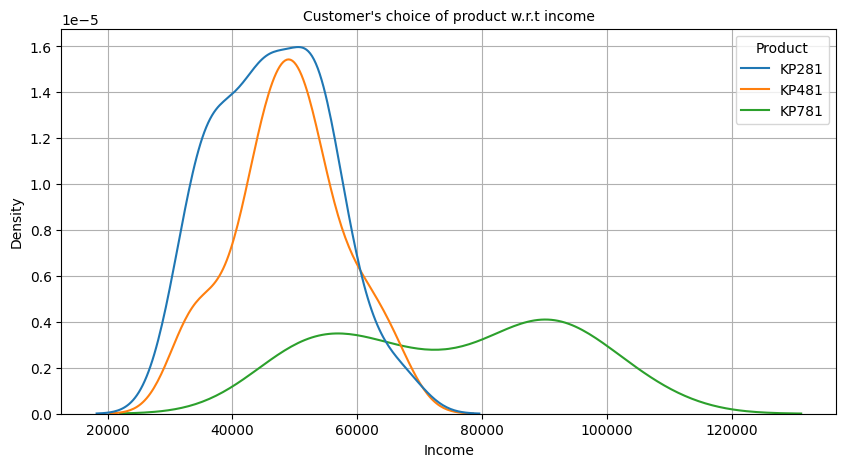

In [13]:
#Customer's choice of product w.r.t income
plt.figure(figsize=(10,5))
sns.kdeplot(data=df,x='Income',hue="Product")
plt.title("Customer's choice of product w.r.t income",fontsize=10)
plt.grid()
plt.show()

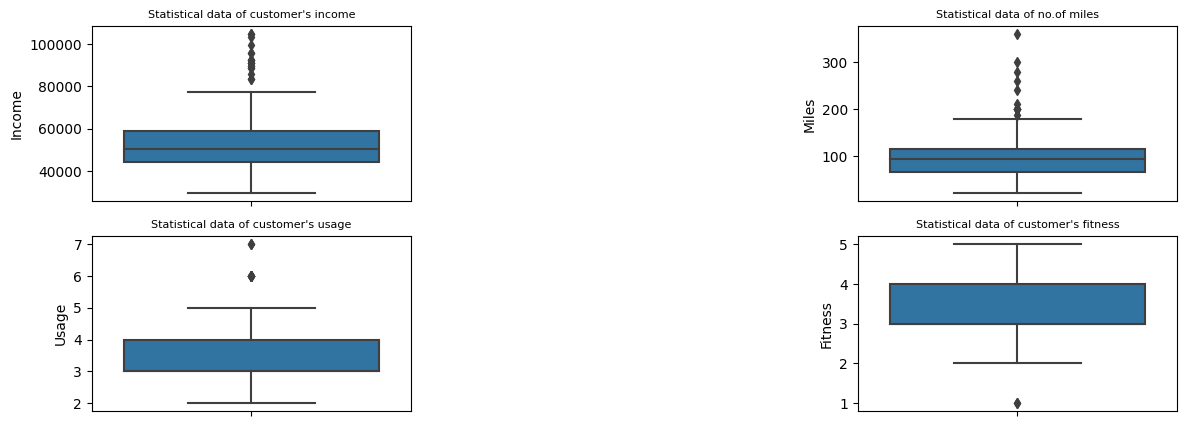

In [14]:
#Statistical data of customer's income,usage,fitness and no.of miles
plt.figure(figsize=(14,5))

plt.subplot(2,3,1)
sns.boxplot(data=df,y='Income')
plt.title("Statistical data of customer's income", fontsize=8)

plt.subplot(2,3,3)
sns.boxplot(data=df,y='Miles')
plt.title("Statistical data of no.of miles",fontsize=8)

plt.subplot(2,3,4)
sns.boxplot(data=df,y='Usage')
plt.title("Statistical data of customer's usage",fontsize=8)

plt.subplot(2,3,6)
sns.boxplot(data=df,y='Fitness')
plt.title("Statistical data of customer's fitness",fontsize=8)

plt.show()

## 3.2 For categorical variable(s)

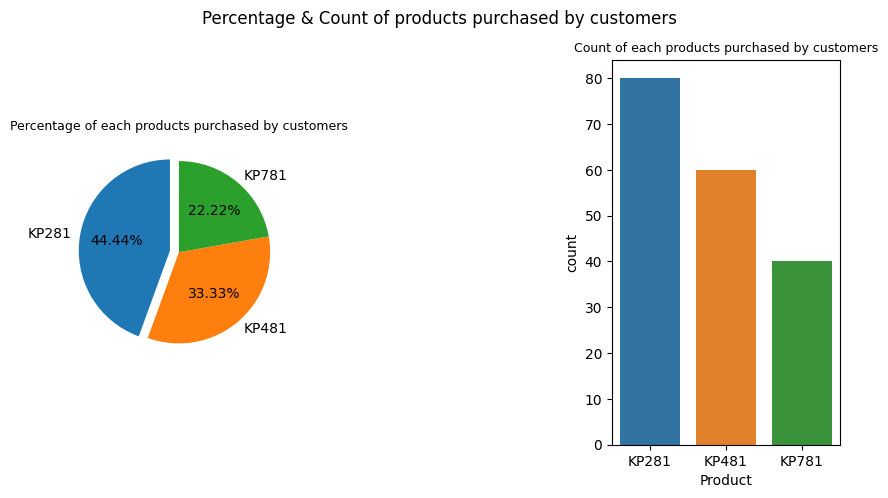

In [15]:
#Percentage/Count of products purchased by customers
plt.figure(figsize=(10,5))
plt.suptitle('Percentage & Count of products purchased by customers')

plt.subplot(1,3,1)
plt.title('Percentage of each products purchased by customers',fontsize=9)
plt.pie(df['Product'].value_counts(),
        labels=df['Product'].value_counts().index,
        autopct='%1.2f%%',
        explode=(0.1,0,0),
        startangle=90)

plt.subplot(1,3,3)
plt.title('Count of each products purchased by customers',fontsize=9)
sns.countplot(data=df,x=df['Product'])

plt.show()

* P(KP281) = 0.444
* P(KP481) = 0.333
* P(KP781) = 0.222

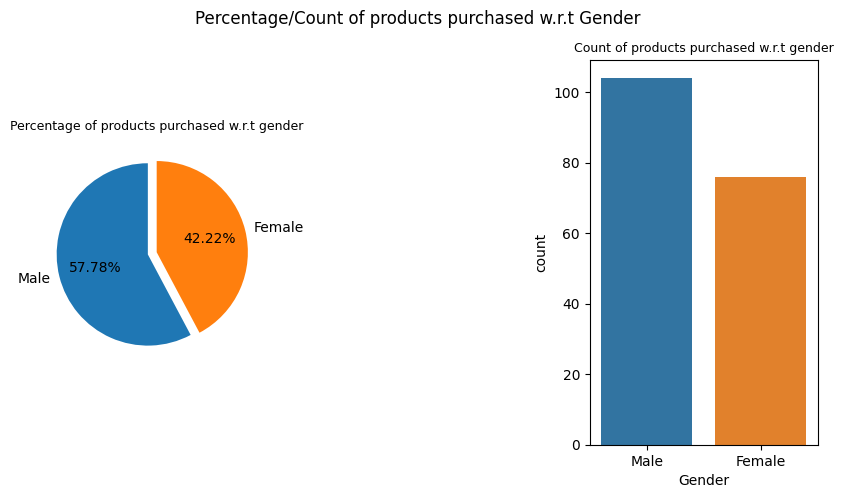

In [16]:
#Percentage/Count of products purchased w.r.t Gender
plt.figure(figsize=(10,5))
plt.suptitle('Percentage/Count of products purchased w.r.t Gender')

plt.subplot(1,3,1)
plt.title('Percentage of products purchased w.r.t gender',fontsize=9)
plt.pie(df['Gender'].value_counts(),
        labels=df['Gender'].value_counts().index,
        autopct='%1.2f%%',
        explode=(0.1,0),
        startangle=90)

plt.subplot(1,3,3)
plt.title('Count of products purchased w.r.t gender',fontsize=9)
sns.countplot(data=df,x=df['Gender'])

plt.show()

* P(Male) = 0.577
* P(Female) = 0.422

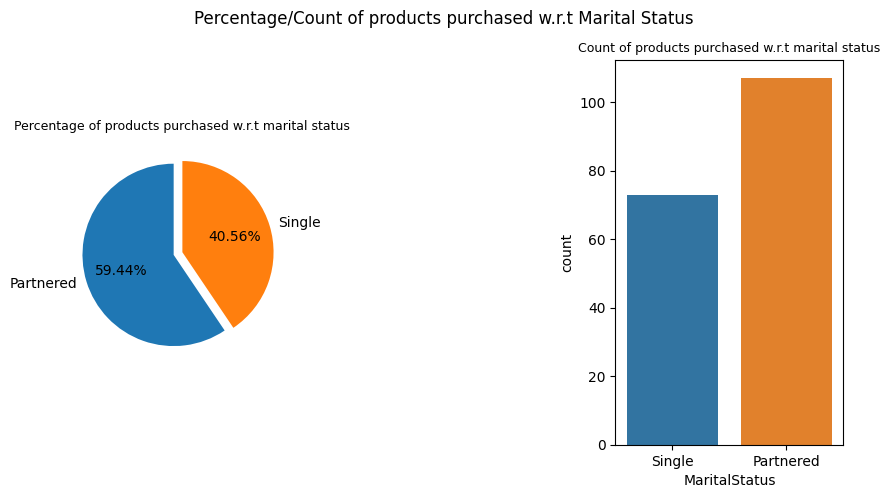

In [17]:
#Percentage/Count of products purchased w.r.t Marital Status
plt.figure(figsize=(10,5))
plt.suptitle('Percentage/Count of products purchased w.r.t Marital Status')

plt.subplot(1,3,1)
plt.title('Percentage of products purchased w.r.t marital status',fontsize=9)
plt.pie(df['MaritalStatus'].value_counts(),
        labels=df['MaritalStatus'].value_counts().index,
        autopct='%1.2f%%',
        explode=(0.1,0),
        startangle=90)

plt.subplot(1,3,3)
plt.title('Count of products purchased w.r.t marital status',fontsize=9)
sns.countplot(data=df,x=df['MaritalStatus'])

plt.show()

* P(Partnered) = 0.594
* P(Single) = 0.405

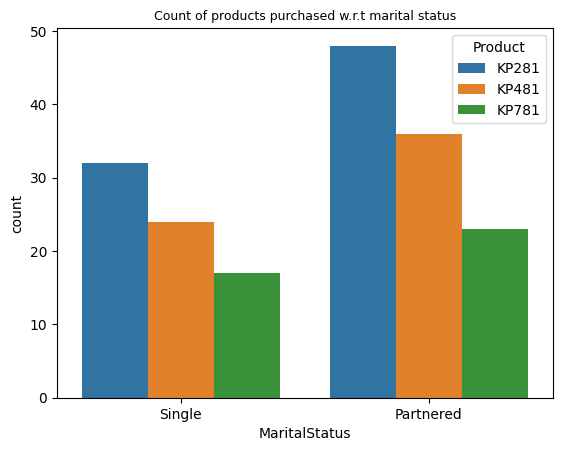

In [18]:
#Count of products purchased w.r.t marital status
plt.title('Count of products purchased w.r.t marital status',fontsize=9)
sns.countplot(data=df,x='MaritalStatus',hue='Product')
plt.show()

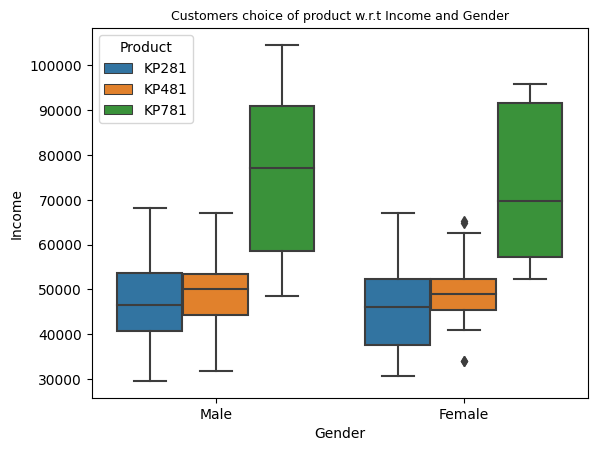

In [19]:
#Customers choice of product w.r.t Income and Gender
plt.title("Customers choice of product w.r.t Income and Gender", fontsize=9 )
sns.boxplot(data=df,x='Gender',y='Income',hue='Product')
plt.show()

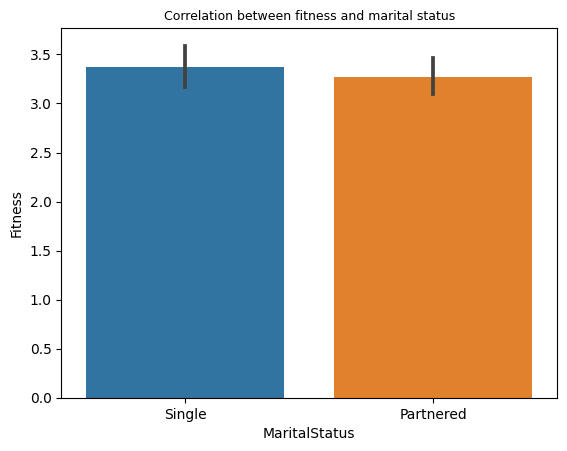

In [20]:
# Correlation between fitness and marital status
plt.title("Correlation between fitness and marital status", fontsize=9 )
sns.barplot(data=df,x='MaritalStatus',y='Fitness',estimator=np.mean)
plt.show()

## 3.3  For correlation

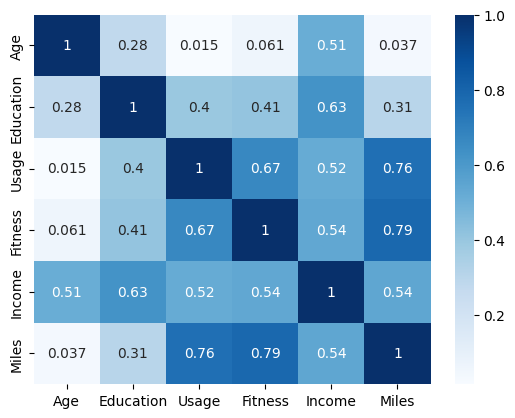

In [29]:
#Heat Map
df_new=df.corr()
sns.heatmap(df_new,cmap='Blues',annot=True)
plt.show()

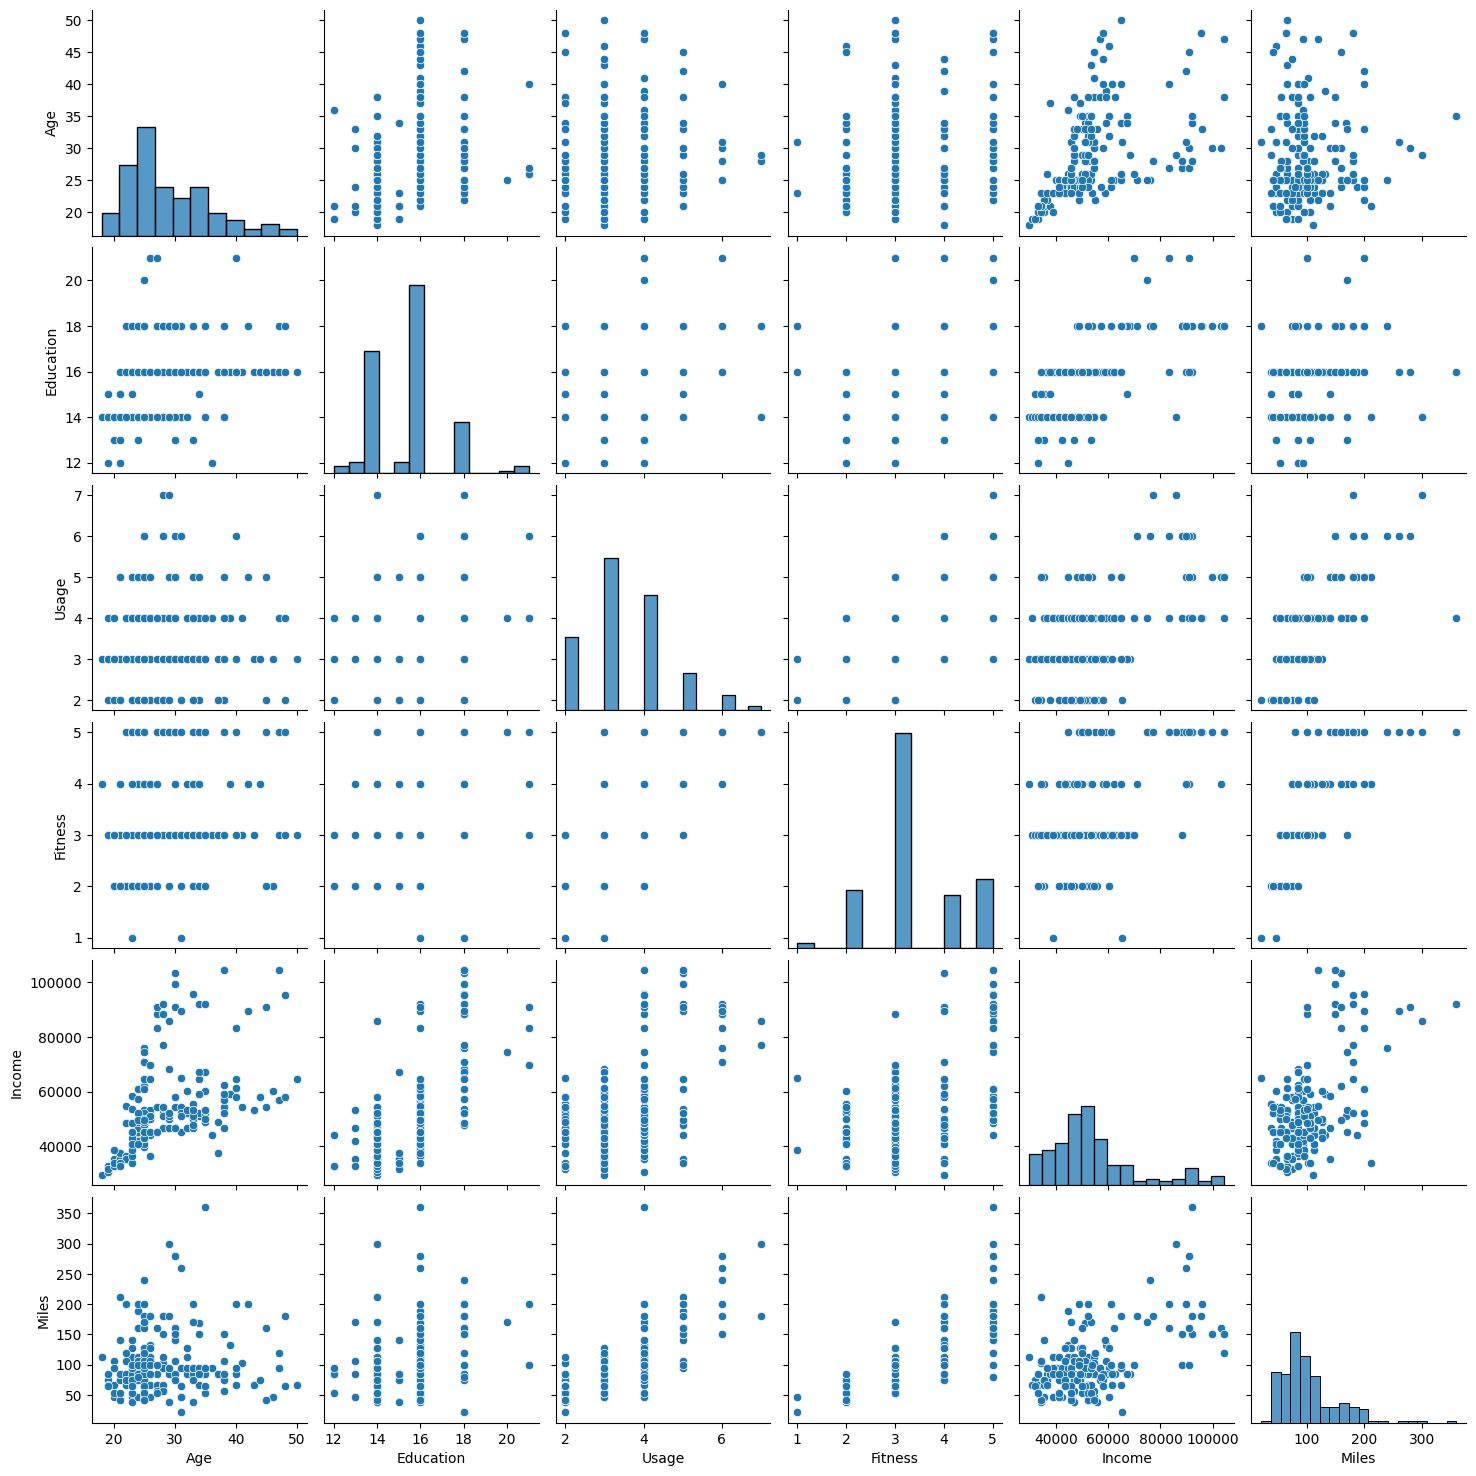

In [22]:
#Pair Plots
sns.pairplot(data=df)
plt.show()

In [23]:
#correlation b/w products and gender
pd.crosstab(df['Product'],df['Gender'],margins=True) 

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [24]:
#correlation b/w products and marital status
pd.crosstab(df['Product'],df['MaritalStatus'],margins=True) 

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


**Conditional Probablity using above crosstab:**

* P(KP281 | Male ) = 0.384
* P(KP481 | Male ) = 0.298
* P(KP781 | Male ) = 0.314


* P(KP281 | Female ) = 0.526
* P(KP481 | Female ) = 0.381
* P(KP781 | Female ) = 0.092


* P(KP281 | Partnered ) = 0.448
* P(KP481 | Partnered ) = 0.336
* P(KP781 | Partnered ) = 0.214


* P(KP281 | Single ) = 0.438
* P(KP481 | Single ) = 0.328
* P(KP781 | Single ) = 0.232

# 4. Missing Value & Outlier Detection

In [25]:
#Missing Value Detection
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

No missing values detected. The dataset is clean.

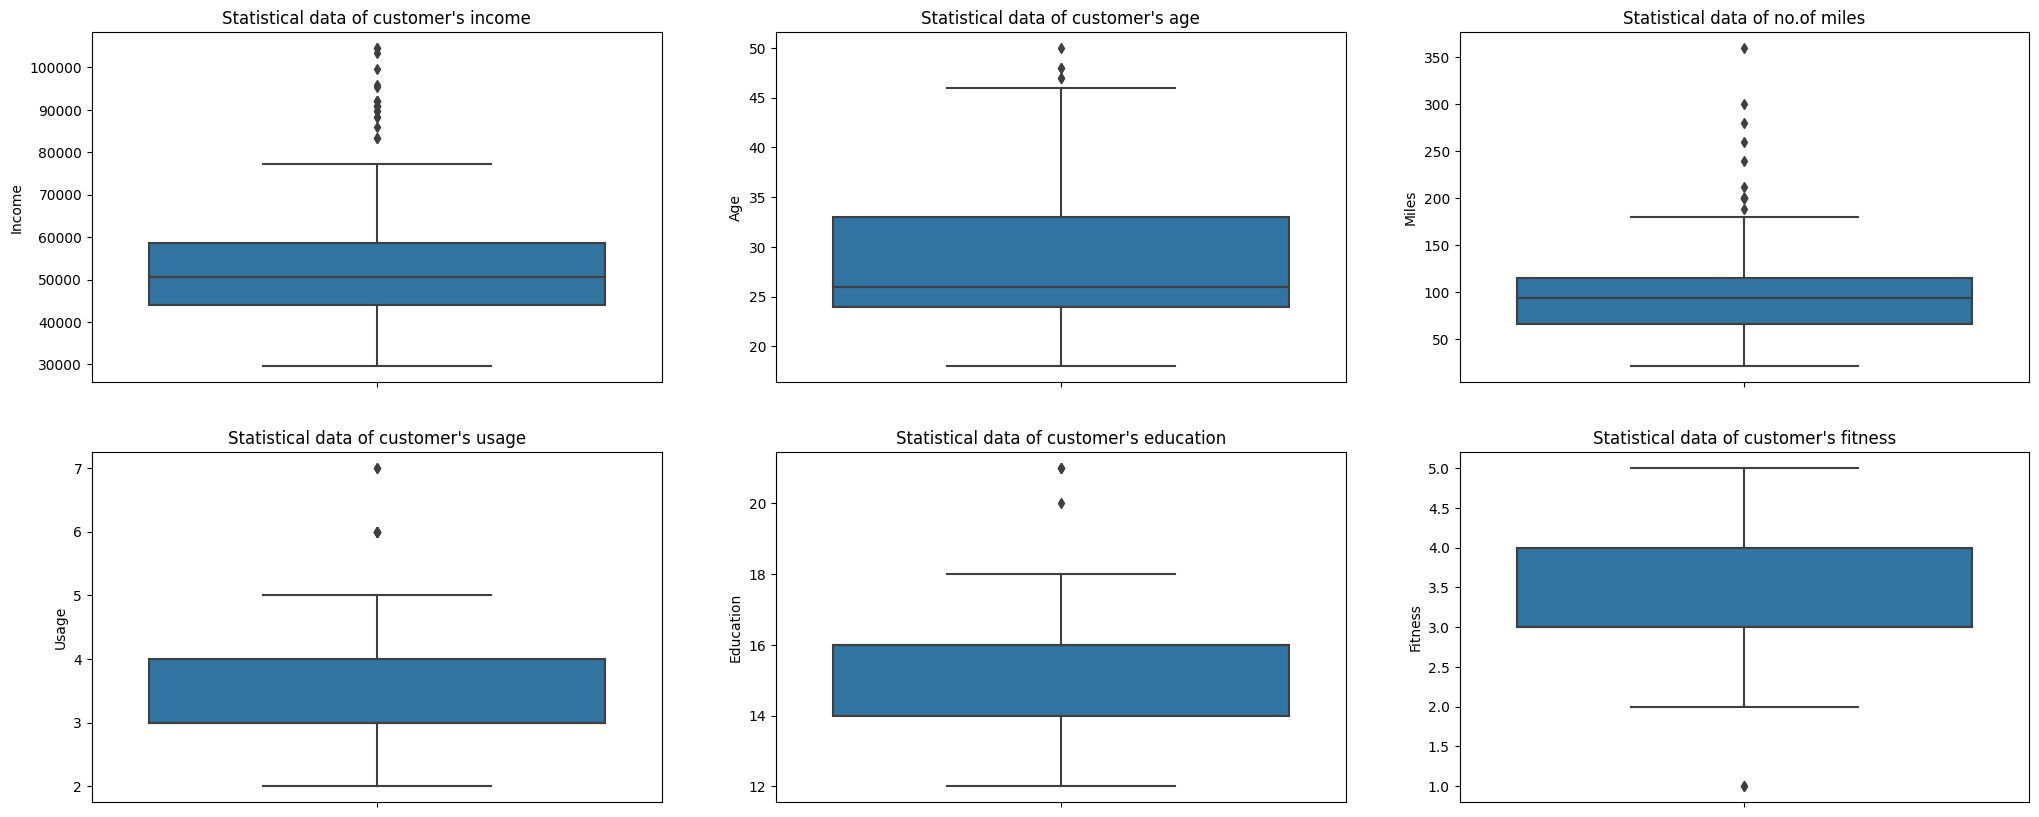

In [26]:
#Outlier Detection

plt.figure(figsize=(25,10))

plt.subplot(2,3,1)
sns.boxplot(data=df,y='Income')
plt.title("Statistical data of customer's income", fontsize=12)

plt.subplot(2,3,2)
sns.boxplot(data=df,y='Age')
plt.title("Statistical data of customer's age",fontsize=12)

plt.subplot(2,3,3)
sns.boxplot(data=df,y='Miles')
plt.title("Statistical data of no.of miles",fontsize=12)

plt.subplot(2,3,4)
sns.boxplot(data=df,y='Usage')
plt.title("Statistical data of customer's usage",fontsize=12)

plt.subplot(2,3,5)
sns.boxplot(data=df,y='Education')
plt.title("Statistical data of customer's education",fontsize=12)

plt.subplot(2,3,6)
sns.boxplot(data=df,y='Fitness')
plt.title("Statistical data of customer's fitness",fontsize=12)

plt.show()

# 5. Business Insights

1. The dataframe consists of 180 data points and 9 features. There are no missing values and on analyzing all the numerical features have potential outliers which are marked in the above plot.
2. The most preferred aerofit product by customers is KP281(44.4%) followed by KP481(33.3%) and KP781(22.2%).
3. When customer base is viewed from the perspective of gender, we can see that male(57.7%) customers are higher than female customers(42.2%).
4. From our analysis, we can also infer that partnered customers(59.4%) are higher than customers who are single(40.5%).
5. KP281 is the most preferred product among a wide range of customers with repect to income, whereas KP481 and KP781 are predominently purchased by medium and high income customers.
6. On analysis, we have found the correlation between fitness and usage to be linear.
7. Males tend to focus on fitness around the age of 29yrs and 34 years, since their fitness reaches their peak around those years.  
8. Females tend to focus on fitness around the age of 33yrs and 44 years, since their fitness reaches their peak around those years.
9. Both male and females tend to purchase aerofit products around the age of 22 years.
10. From our analysis, fifty percentile of the customers earn an income of 50k, have fitness & usage of 3.5 and run 90 miles.

# 6. Recommendations

1. Since KP281 is the most purchased product aoung all the income range, production of more of this kind  would be profitable.
2. Since more than half of the customer lie in their early twentees, it is more likely that they would be willing to buy if approached properly.
3. If a customer's marital status is partnered, he or she has more than fifty percent probablity of buying the product.
4. Since males fitness peak around 29yrs and 34 years, it is more likely that the customer will buy high ended products if persuaded.
5. The above applies for females of age 33yrs and 44 years.
6. It is more likely that a male would prefer KP781 over KP481.
7. Order of preferrence for buying a product i case of a female cutomer is KP281 followed bu KP481 and KP781.